# Colab Setup

This notebook gives a brief introduction to Colab and some of the libraries we'll use in the Machine Learning course. 

## Using Colab

A Colab is a list of *cells*. Each cell is either a text cell (like this one) or a code cell (like the one below). To run code cells, you must be connected to a runtime server. Click *Connect* in the toolbar (top-right). Then, to run the cell below:
* Click the **Play icon** in the left gutter of the cell
* Type **Cmd/Ctrl+Enter** to run the cell in place
* Type **Shift+Enter** to run the cell and move focus to the next cell (adding one if none exists)

Check out more keyboard shortcuts in **Tools->Keyboard shortcuts**.

In [1]:
# Print Hello World.
print("Hello World")

# Do some basic computation.
x = 5
y = x + 2
print(y)

# Define a Python function.
def add_two(x):
  return x+2
print(add_two(20))

Hello World
7
22


### Warning: Global Variables!

In Colab, all the variables are global: once created, they are accessible from any code cell. However, you should make sure that your whole Colab executes properly from top to bottom. It's a good idea to use **Runtime -> Restart runtime** and then **Runtime -> Run all** to make sure everything works as intended, especially before you submit.

# Brief Tour of Python Libraries

Here, we'll briefly introduce the most important libraries used in this course.

## Numpy

Numpy is a scientific computing library with lots of tools, but at its core is the idea of an n-dimensional array. We will mostly use numpy to create and manipulate arrays. Note that a 1-D array is called a *vector*, a 2-D array is called a *matrix*, and n-D arrays are sometimes referred to as *tensors* (thus, *TensorFlow*, but more on that later).

Try running the code below and make sure you understand what it's doing. See the [Numpy Quickstart Guide](https://numpy.org/doc/stable/user/quickstart.html) for more.

In [2]:
import numpy as np

# Create a new 1-D array with 15 integers.
x = np.arange(0,15)
print('Here is x:\n', x)
print('Shape of x:', x.shape)

# Resize the array to 3 rows by 5 columns (3x5).
y = x.reshape(3,5)
print('Here is y:\n', y)
print('Shape of y:', y.shape)

# Use array slicing to get a single row or a single column.
print('Here is the first row of y:\n', y[0,:])
print('Here is the first column of y:\n', y[:,0])

Here is x:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Shape of x: (15,)
Here is y:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
Shape of y: (3, 5)
Here is the first row of y:
 [0 1 2 3 4]
Here is the first column of y:
 [ 0  5 10]


## Matplotlib

This is the plotting library we'll use for all kinds of data visualization. It's both powerful and confusing. Honestly, I never remember how to do anything with it, and rely on Google to find documentation (or better yet, examples) of what I want.

In addition, the Seaborn library often makes the standard matplotlib output much nicer, and includes some fancy visualization tools that we'll use from time to time.

Finally, you should familiarize yourself with reading the documentation pages for library functions like [np.random.uniform](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) and [matplotlib.pyplot.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

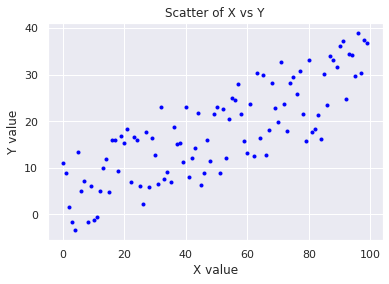

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

# Generate 100 x values.
X = np.arange(0, 100)

# Random values in [-10,10] with the same shape as X.
noise = np.random.uniform(-10, 10, len(X))

# Generate 100 y values with a linear relationship to x (plus the noise).
Y = 0.25 * X + 5.0 + noise

# Use the plot function to create a scatter plot.
plt.plot(X, Y,
         marker='.', linestyle='', color='blue', markersize=6)

# Add axis labels and a title.
plt.xlabel('X value')
plt.ylabel('Y value')
plt.title("Scatter of X vs Y")
plt.show()

## Pandas

Pandas is widely used for handling ML datasets and is well integrated with Numpy, Matplotlib, and TensorFlow. A Pandas *dataframe* object is a wrapper around a table (like a numpy array) with labeled columns. It's easiest to look at an example.

In [ ]:
import pandas as pd

# Load the 1990s California Housing dataset as a Pandas dataframe.
# For details, see https://developers.google.com/machine-learning/crash-course/california-housing-data-description.
# Note that each example (row) in this dataset describes a neighborhood.
ca_housing_df = pd.read_csv('https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv')

# Show the first few rows.
# The display function is is not standard Python, but is useful in Colab to
# print some objects that have their own rendering code (like a dataframe).
# You can try replacing display() with print() to see the difference.
display(ca_housing_df.head())

# Show summary statistics for the data.
display(ca_housing_df.describe())

# Plot a histogram of the median house values.
plt.hist(ca_housing_df['median_house_value'], bins=50)
plt.title('CA Housing Data (1990s) Median House Value')
plt.show()

## TensorFlow and Keras

Finally, we'll be using TensorFlow to train ML models. TensorFlow is a large and complex library, including many constantly evolving functions and APIs (Keras is one set of convenient APIs inside TensorFlow). This means you'll want to learn how to use the documentation and the high-level ideas that guide its design.

The trickiest thing to understand about TensorFlow is primary way in which it differs from standard programming. In a typical program, each line of code is executed sequentially. In TensorFlow, by contrast, you first define a computation graph. The graph specifies how data flows from input to output. However, no computation actually happens until data is passed into the graph and execution begins.

Here's a simple example. Don't worry about understanding the ML details. In a few weeks, you'll understand everything in the code below.

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Column names to use as input features.
features = ['housing_median_age', 'total_rooms', 'total_bedrooms',
            'population', 'households', 'median_income']

# Apply log transforms to input features and output values.
X = np.log(ca_housing_df[features])
Y = np.log(ca_housing_df['median_house_value'])

def build_model(num_features):
  """Return a simple linear regression model using the Keras Sequential API."""
  # Clear session and set a random seed for consistent behavior.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  # Use Keras Sequential API to build a linear regression model.
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      input_shape=[num_features], # each input has num_features features
      units=1,                    # there is a single output
      use_bias=True               # include a learned bias parameter
      ))
  
  # Use mean absolute error as our loss and the Adam optimizer.
  model.compile(loss='mae', optimizer='Adam')
  return model

# Build a model and train it. Hold out 10% of data for validation.
model = build_model(num_features=len(features))
model.fit(x=X, y=Y,
          validation_split=0.1, batch_size=16, epochs=5)

# Use the model to predict the training labels.
Y_pred = model.predict(x=X).flatten()

# Compute training data errors by converting back from the log scale.
error = np.exp(Y) - np.exp(Y_pred)
mean_error = error.mean()

# Plot an error histogram.
plt.hist(error, bins=20, range=(-1e6, 1e6), alpha=0.6)

# Also show the average error explicitly in the same plot.
plt.axvline(mean_error, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(mean_error, max_ylim*0.9, 'Mean: {:.2f}'.format(mean_error))
plt.show()

## Exercise 1: Plot histograms
After reading over the code above, plot a [histogram](https://en.wikipedia.org/wiki/Histogram) of the population values in the California Housing dataset, using 100 bins. Also plot a second histogram of the log of the population values.

### Student Solution

In [ ]:
# YOUR CODE HERE

WRITE YOUR ANSWER HERE

### Answer Key

In [ ]:
plt.hist(ca_housing_df['population'], bins=100)
plt.show()
plt.hist(np.log(ca_housing_df['population']), bins=100)
plt.show()